# Biodiversity & Species Conservation in National Parks

The data analysed in this project comes from the National Parks Service and contains information about endangered species in different parks. The general objective is to analyse the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. 

The data is divided in two files, which contain the following information:

* **species_info.csv** - contains data about different species and their conservation status
    * **category** - class of animal
    * **scientific_name** - the scientific name of each species
    * **common_name** - the common names of each species
    * **conservation_status** - each species' current conservation status


* **observations.csv** - holds recorded sightings of different species at several national parks for the past 7 days
    * **scientific_name** - the scientific name of each species
    * **park_name** - Park where species were found
    * **observations** - the number of times each species was observed at the park

## Objectives of the Analysis

* Data wrangling and tidying for both datasets
* Examine the distribution of the conservation status across different species. Are certain species or species' categories more likely to be endangered?
* Explore the observations of different species in the national parks. Wich park seems to be the richer in terms of wildlife? What are most frequently observed and least frequently observed species in each park? Are the least frequently observed species registered as threatened or endangered species? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binomtest

In [2]:
# Load files
species = pd.read_csv('species_info.csv')


In [3]:
obs = pd.read_csv('observations.csv')


In [4]:
# Print first rows of the 'species' dataframe
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [5]:
# Explore the data types and potential missing values from the species df
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [11]:
# Number of values in the 'category' variable in species df
species.category.value_counts()

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64

In [13]:
# Number of values in the 'conservation_status' variable in species df
species.conservation_status.value_counts()

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

In [15]:
# Summary statistics from the species df
species.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [17]:
# Check for duplicates in the 'species' dataset
species.duplicated().value_counts()

False    5824
Name: count, dtype: int64

In [19]:
# Check for duplicates in the 'scientific_name' variable
species.duplicated(subset=['scientific_name']).value_counts()

False    5541
True      283
Name: count, dtype: int64

In [21]:
# Create a subset dataframe containing only the observations duplicated in the 'scientific_name' variable
duplicated_species = species[species.duplicated('scientific_name', keep=False) == True]

# Visualize the duplicated species in order to decide whether to drop them from the dataset
print(duplicated_species[duplicated_species.scientific_name == 'Puma concolor'])
print(duplicated_species[duplicated_species.scientific_name == 'Cervus elaphus'])
duplicated_species.head(8)

     category scientific_name                 common_names conservation_status
16     Mammal   Puma concolor      Panther (Mountain Lion)                 NaN
3022   Mammal   Puma concolor  Cougar, Mountain Lion, Puma                 NaN
4451   Mammal   Puma concolor                Mountain Lion                 NaN
     category scientific_name        common_names conservation_status
4      Mammal  Cervus elaphus       Wapiti Or Elk                 NaN
3017   Mammal  Cervus elaphus  Rocky Mountain Elk                 NaN


,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
8,Mammal,Canis lupus,Gray Wolf,Endangered
10,Mammal,Urocyon cinereoargenteus,"Common Gray Fox, Gray Fox",NaN
16,Mammal,Puma concolor,Panther (Mountain Lion),NaN
18,Mammal,Spilogale putorius,Eastern Spotted Skunk,NaN
20,Mammal,Lutra canadensis,Northern River Otter,NaN


In [23]:
# Check for duplicates in the 'common_names' variable
species.duplicated(subset=['common_names']).value_counts()

False    5504
True      320
Name: count, dtype: int64

### Data Exploration: Species Dataset

All the variables of the species dataframe are recognised as object data type, which is correct as none of the variables are numerical. The only variable of this dataset containing missing data is `conservation_status`. However, by looking at the categories within the `conservation_status` variable, we can see that there is no category for NOT threatened species. Therefore, it seems like the conservation status has only been recorded in those species cosidered at risk. Regarding the `category` variable, the species are divided into 7 different categories, of which the most abundant is 'Vascular Plant'. 

The descriptives table informs that the most frequent value for the `scientific_name` column is 'Castor canadensis' with a frequency of 3. As the scientific name of the species is unique, a frequency of more than 1 suggests the presence of duplicated values. In fact, a total of 283 values within the `scientific_name` variable seem to be duplicated, whereas no duplicate value was detected when looking at the **species** dataset as a whole. Having a closer look at the duplicated values in the `scientific_name` column, we observe that some observations have been given the same scientific name but slightly different annotations for the common names. For this reason, no duplicated values were found when looking at the dataset as a whole. On the other hand, the variable `common_names` seems to have an even higher number of duplicated values (a total of 320). It should be noted that the annotations in the `common_names` variable are not consistent and do not provide aditional information to the `scientific_name` variable. Therefore, for the purpose of this analysis, we decided to drop the duplicates of the `scientific_name` variable only. 

In [26]:
# Drop duplicates of the 'scientific_name' variable
species.drop_duplicates(subset=['scientific_name'],inplace=True)
len(species)

5541

C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_54300\796001577.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(species['category'], palette='bright')


Text(0.5, 0, 'Count')

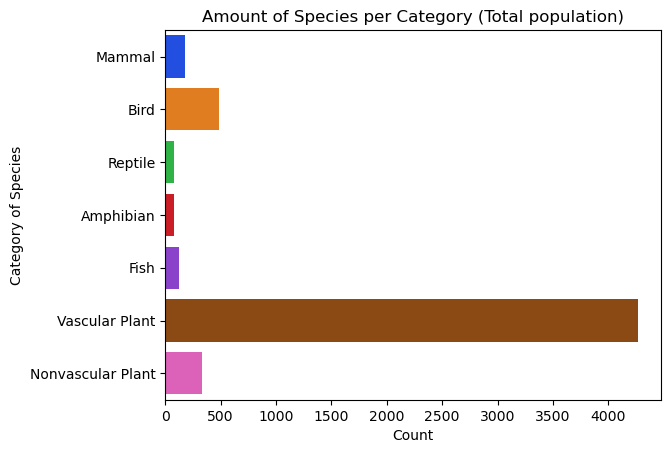

In [52]:
# Bar plot of the 'category' variable
sns.countplot(species['category'], palette='bright')
plt.title('Amount of Species per Category (Total population)')
plt.ylabel('Category of Species')
plt.xlabel('Count')

In [54]:
# Create a subset of the 'species' dataframe containing threatened animals (animals without a NaN in the 'conservation_status' variable)
threatened = species.dropna(subset=['conservation_status'])
threatened.reset_index(drop=True, inplace=True)
threatened.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Canis latrans,Coyote,Species of Concern
1,Mammal,Canis lupus,Gray Wolf,Endangered
2,Mammal,Canis rufus,Red Wolf,Endangered
3,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
4,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern


C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_54300\1112110714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(threatened['category'], palette='bright')


Text(0.5, 0, 'Count')

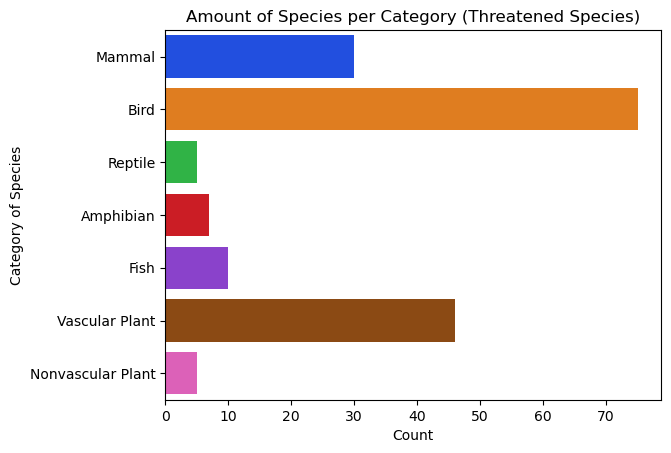

In [56]:
# Bar plot of the 'category' variable in the threatened group
sns.countplot(threatened['category'], palette='bright')
plt.title('Amount of Species per Category (Threatened Species)')
plt.ylabel('Category of Species')
plt.xlabel('Count')

In [34]:
categories = species.category.unique()
cat_percent = []

for category in categories:
    percent_total = len(species[species.category == category])*100/len(species)
    percent_threat = len(threatened[threatened.category == category])*100/len(threatened)
    cat_percent.append([category,percent_total,percent_threat])

categories_percent = pd.DataFrame(cat_percent,columns=['category','total', 'threatened'])
categories_percent
    

,category,total,threatened
0,Mammal,3.176322,16.853933
1,Bird,8.807075,42.134831
2,Reptile,1.407688,2.808989
3,Amphibian,1.425735,3.932584
4,Fish,2.255910,5.617978
5,Vascular Plant,76.917524,25.842697
6,Nonvascular Plant,6.009746,2.808989


In [36]:
# Modify the dataframe so it can be ploted more easily
categories_percent = pd.melt(frame=categories_percent, id_vars='category',value_vars=['total','threatened'] ,value_name='percentage', var_name='population')
categories_percent

,category,population,percentage
0,Mammal,total,3.176322
1,Bird,total,8.807075
2,Reptile,total,1.407688
3,Amphibian,total,1.425735
4,Fish,total,2.255910
5,Vascular Plant,total,76.917524
6,Nonvascular Plant,total,6.009746
7,Mammal,threatened,16.853933
8,Bird,threatened,42.134831
9,Reptile,threatened,2.808989


### Data Analysis: Species Dataset

Among all the species that can be found in the National Parks included in the study, most fall within the category of Vascular Plants (\~77 \%). Other commonly found species are Birds (\~8.8 \%) and Nonvascular Plants (~6 %). However, the distribution of species' categories in the group of species under certain degree of risk (including species of concern, endangered species, threatened species, or species in recovery) is somewhat different to the overal species' categories distribution. As such, over 42 % of the species in the risk group are birds, and only 25.8 % are vascular plants. This finding suggest that some species' categories are more vulnerable to be threatened or endangered. 

Two-sided binomial tests were carried out for each species categories comparing the proportion of that category in the risk group with the proportion in the overall species population of the parks. According to the statistical results and a signficance treshold of 0.05, the species belonging to the categories mammals, birds, amphibians and fish are significantly more vulnerable to be threatened or endangered. No significant difference was found for reptiles and nonvascular plants. Vascular plants seem to be significantly less vulnerable to be threatened or endangered. ery

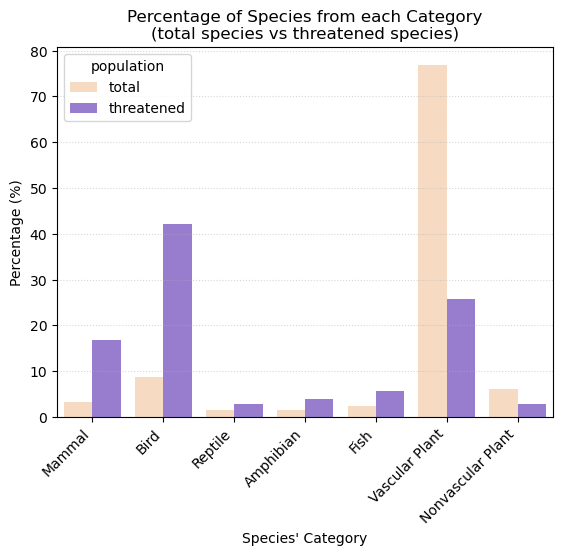

In [38]:
# Plot the percentages of species' categories in the total population and in the threatened group
sns.barplot(data=categories_percent, x='category', y='percentage', hue='population', palette=['peachpuff','mediumpurple'])
plt.title('Percentage of Species from each Category\n(total species vs threatened species)')
plt.xlabel("Species' Category")
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')  # Rotate by 45 degrees and align right
plt.grid(visible=True, which='major', axis='y', alpha=0.5, linestyle=':')

In [50]:
# Binomial test per species category: Is the proportion of each category in the threatened group statistically significant from the total population?
binom_pval = []

for category in categories:
    obs_outcome = len(threatened[threatened.category == category]) # Number of species of the category in the threatened group
    sample_size = len(threatened) # total number of species in the threatened group
    prob_success = len(species[species.category == category])/len(species) # proportion of that category in the total species population
    results = binomtest(obs_outcome, sample_size, prob_success)
    binom_pval.append([category,results.pvalue])

binomtest_pval = pd.DataFrame(binom_pval, columns=['category','p-value'])
binomtest_pval

,category,p-value
0,Mammal,1.047138e-13
1,Bird,1.597898e-32
2,Reptile,1.081577e-01
3,Amphibian,1.454618e-02
4,Fish,7.592093e-03
5,Vascular Plant,5.802310e-47
6,Nonvascular Plant,8.085521e-02


In [109]:
# Print first rows of the 'obs' dataframe
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [111]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [113]:
obs.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [129]:
print(obs.duplicated().value_counts())
dup = obs[obs.duplicated(keep=False) == True]


# Visualize the duplicated species in order to decide whether to drop them from the dataset
dup

False    22164
Name: count, dtype: int64


,scientific_name,park_name,observations


In [117]:
# Drop duplicates of the 'obs' dataset
obs.drop_duplicates(inplace=True)
len(obs)

23281

In [119]:
obs.park_name.value_counts()

park_name
Bryce National Park                    5823
Yosemite National Park                 5821
Yellowstone National Park              5819
Great Smoky Mountains National Park    5818
Name: count, dtype: int64

In [121]:
# Create a dataframe with the subset of observations from the Great Smoky Montains (GSM) National Park 
# The objective is to evaluate what is happening with the duplicated species in a smaller subset of the data
GSM = obs[obs.park_name == 'Great Smoky Mountains National Park']
GSM.duplicated().value_counts()

False    5818
Name: count, dtype: int64

In [123]:
# Create a df with the duplicated values for the variable 'scientific_name' within the GSM df
dup_GSM = GSM[GSM.duplicated('scientific_name',keep=False) == True]

# Visualize the duplicated species in order to decide whether to drop them from the dataset
print(dup_GSM[dup_GSM.scientific_name == 'Lunaria annua'])
print(dup_GSM[dup_GSM.scientific_name == 'Saponaria officinalis'])
dup_GSM.head(10)

     scientific_name                            park_name  observations
15     Lunaria annua  Great Smoky Mountains National Park            65
3697   Lunaria annua  Great Smoky Mountains National Park            95
             scientific_name                            park_name  \
218    Saponaria officinalis  Great Smoky Mountains National Park   
19120  Saponaria officinalis  Great Smoky Mountains National Park   

       observations  
218              79  
19120            85  


,scientific_name,park_name,observations
15,Lunaria annua,Great Smoky Mountains National Park,65
27,Scirpus cyperinus,Great Smoky Mountains National Park,73
40,Cirsium arvense,Great Smoky Mountains National Park,85
43,Portulaca oleracea,Great Smoky Mountains National Park,76
72,Odocoileus virginianus,Great Smoky Mountains National Park,36
133,Hypochaeris radicata,Great Smoky Mountains National Park,57
182,Secale cereale,Great Smoky Mountains National Park,82
218,Saponaria officinalis,Great Smoky Mountains National Park,79
301,Nycticorax nycticorax,Great Smoky Mountains National Park,64
403,Mimus polyglottos,Great Smoky Mountains National Park,116


In [72]:
# Group the duplicate observations into one adding up the number of times each species has been spotted
dup_GSM = dup_GSM.groupby(['scientific_name','park_name'])['observations'].sum().reset_index()
# Check whether it has worked
print(dup_GSM[dup_GSM.scientific_name == 'Lunaria annua'])

    scientific_name                            park_name  observations
133   Lunaria annua  Great Smoky Mountains National Park           160


In [125]:
# Group the observation from the same species and same park adding up the number of times they have been spoted 
obs = obs.groupby(['scientific_name','park_name'])['observations'].sum().reset_index()
obs.park_name.value_counts()

park_name
Bryce National Park                    5541
Great Smoky Mountains National Park    5541
Yellowstone National Park              5541
Yosemite National Park                 5541
Name: count, dtype: int64

### Data Exploration: Observations Dataset

The `scientific_name` and `park_name` variables of the dataset have been identified as object data type, whereas the `observations` variable is registered as int. Therefore, all the variables in the dataset are correct in terms of data type. There are four different national parks included in the analysis and 5541 species. 

A total of 15 observations were found to be duplicated and droped from the dataset. However, even with this correction, the number of observations for each national park was superior (>200 observations) to the number of unique species (5541), which may indicate that some species have been recorded more than once within the same national park. To have a closer look at this problem, a subset dataframe containing only the observations at the Great Smoky Montains (GSM) National Park was created. By observing the duplicates for `scientific_name` in this subset, we were able to confirm that some species have been input twice and the number of times the species have been spotted vary. To solve this issue, the species duplicates within each natural park have been group together, adding up the number of times the species have been spotted. 


Text(0.5, 9.444444444444438, 'Number of observation per species')

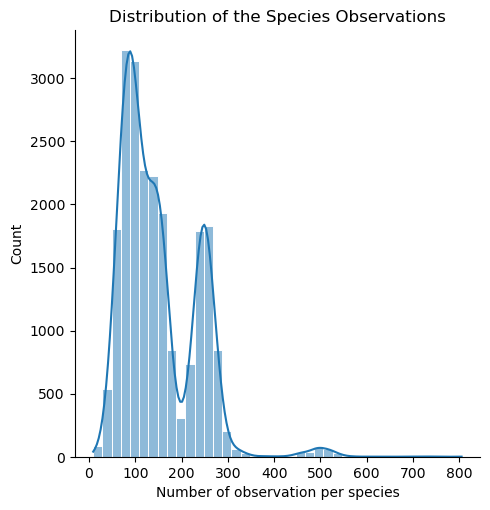

In [287]:
# Histogram of observations
sns.displot(data=obs, x='observations', bins=40, kde=True, edgecolor='white')
plt.title('Distribution of the Species Observations')
plt.xlabel('Number of observation per species')

Text(0.5, 9.444444444444438, 'Number of observation per species')

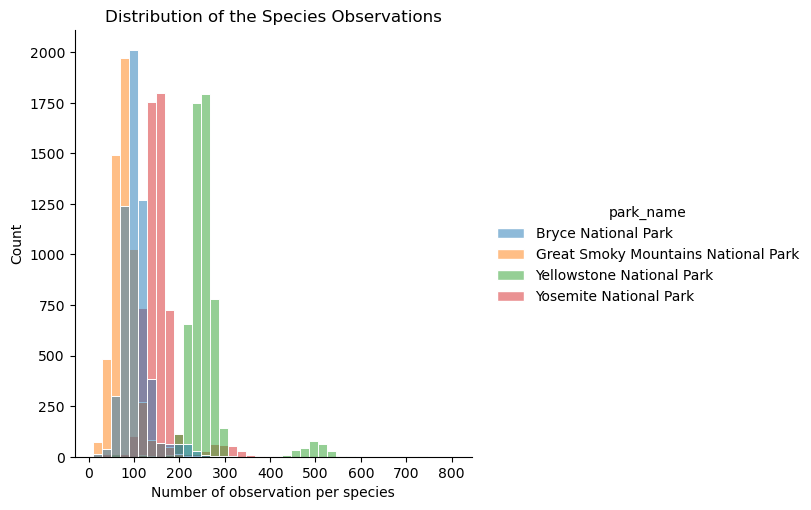

In [289]:

sns.displot(data=obs, x='observations', hue='park_name', bins=40, edgecolor='white')
plt.title('Distribution of the Species Observations')
plt.xlabel('Number of observation per species')


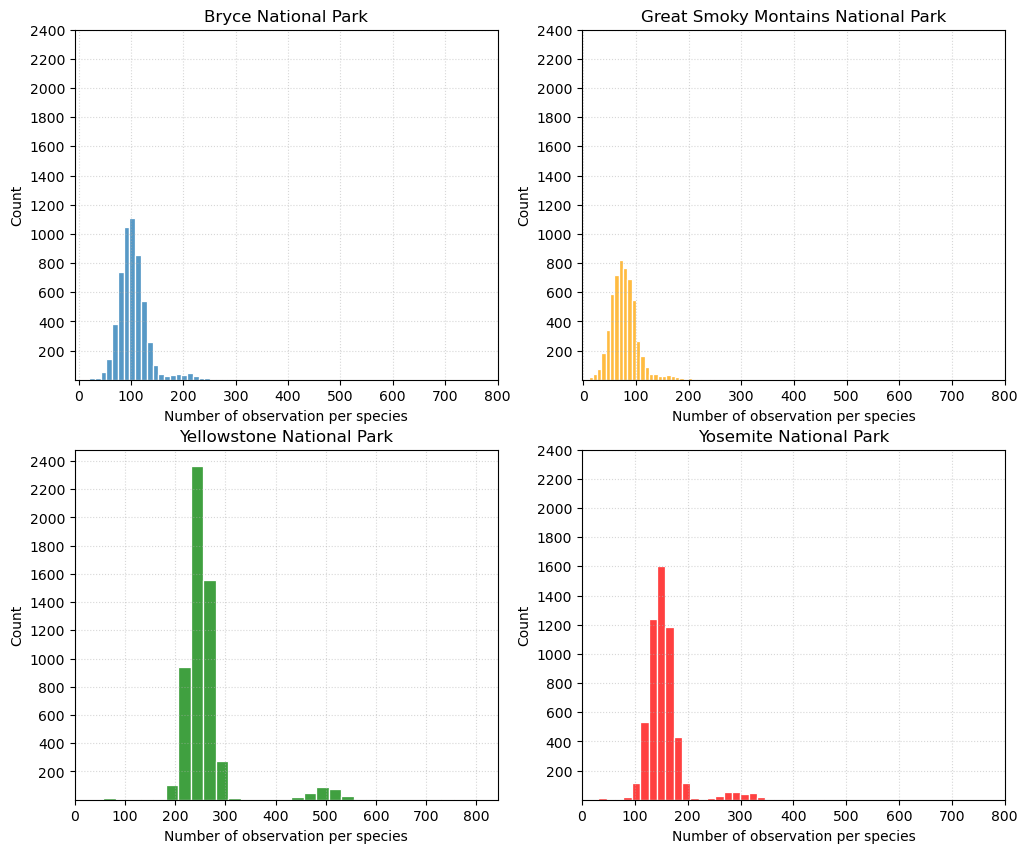

In [236]:
parks = obs.park_name.unique()
Bryce = obs[obs.park_name == parks[0]]
GSM = obs[obs.park_name == parks[1]]
Yellow = obs[obs.park_name == parks[2]]
Yose = obs[obs.park_name == parks[3]]
y_ticks = [200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400]
x_ticks = [0,100,200,300,400,500,600,700,800]

fig, axs = plt.subplots(2,2, figsize=(12,10))
sns.histplot(data=Bryce, x='observations', bins=30, ax=axs[0,0], edgecolor='white')
axs[0,0].set_title('Bryce National Park')
axs[0,0].set_xlabel('Number of observation per species')
axs[0,0].set_xticks(x_ticks)
axs[0,0].set_yticks(y_ticks)

sns.histplot(data=GSM, x='observations', bins=30, ax=axs[0,1], color='orange', edgecolor='white')
axs[0,1].set_title('Great Smoky Montains National Park')
axs[0,1].set_xlabel('Number of observation per species')
axs[0,1].set_xticks(x_ticks)
axs[0,1].set_yticks(y_ticks)

sns.histplot(data=Yellow, x='observations', bins=30, ax=axs[1,0], color='green', edgecolor='white')
axs[1,0].set_title('Yellowstone National Park')
axs[1,0].set_xlabel('Number of observation per species')
axs[1,0].set_xticks(x_ticks)
axs[1,0].set_yticks(y_ticks)

sns.histplot(data=Yose, x='observations', bins=30, ax=axs[1,1], color='red', edgecolor='white')
axs[1,1].set_title('Yosemite National Park')
axs[1,1].set_xlabel('Number of observation per species')
axs[1,1].set_xticks(x_ticks)
axs[1,1].set_yticks(y_ticks)

# Add grid to the subplots
for ax in axs.flat:
    ax.grid(visible=True, which='major', axis='both', alpha=0.5, linestyle=':') 

C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_33640\3379346404.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='park_name',y='observations', data=obs, palette='bright')
C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_33640\3379346404.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Bryce', 'G. Smoky Mountains', 'Yellowstone', 'Yosemite'], rotation=45, ha='right')


[Text(0, 0, 'Bryce'),
 Text(1, 0, 'G. Smoky Mountains'),
 Text(2, 0, 'Yellowstone'),
 Text(3, 0, 'Yosemite')]

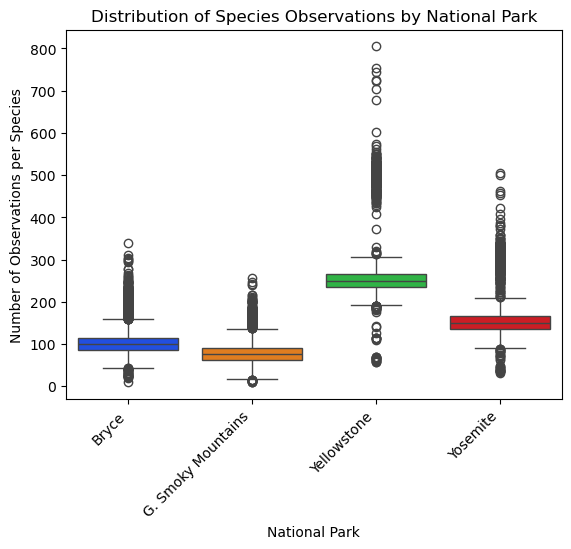

In [230]:
# Boxplot for the 'observations' variable in each National Park
ax = sns.boxplot(x='park_name',y='observations', data=obs, palette='bright')
ax.set_ylabel('Number of Observations per Species')
ax.set_xlabel('National Park')
ax.set_title('Distribution of Species Observations by National Park')
# Shorten and rotate xticks by 45 degrees and align right 
ax.set_xticklabels(['Bryce', 'G. Smoky Mountains', 'Yellowstone', 'Yosemite'], rotation=45, ha='right')



C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_33640\265508211.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=obs, x='park_name', y='observations', palette='pastel')
C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_33640\265508211.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Bryce', 'G. Smoky Mountains', 'Yellowstone', 'Yosemite'], rotation=45, ha='right')


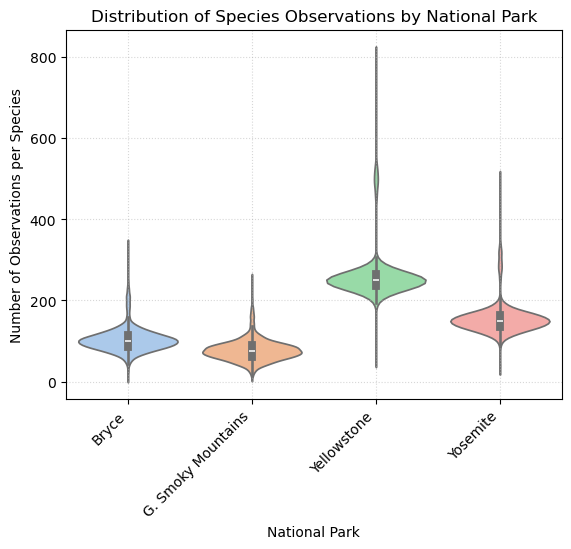

In [234]:
ax = sns.violinplot(data=obs, x='park_name', y='observations', palette='pastel')
ax.set_ylabel('Number of Observations per Species')
ax.set_xlabel('National Park')
ax.set_title('Distribution of Species Observations by National Park')
ax.set_xticklabels(['Bryce', 'G. Smoky Mountains', 'Yellowstone', 'Yosemite'], rotation=45, ha='right')

plt.grid(visible=True, which='major', axis='both', alpha=0.5, linestyle=':')